In [1]:
from SALib.sample import sobol as sobol_sam
import numpy as np

In [2]:
all_res = np.load('results_m.npz')

In [4]:
import numpy as np
svrv = all_res['rvsv']
svlv = all_res['lvsv']
rvef = all_res['rvef']
lvef = all_res['lvef']
pasp = all_res['pasp']
padp = all_res['padp']
lvsp = all_res['lvsp']
rvsp = all_res['rvsp']
lvedv = all_res['lvedv']
lvesv = all_res['lvesv']
rvedv = all_res['rvedv']
rvesv = all_res['rvesv']

In [6]:
import matplotlib.pyplot as plt
from SALib.sample import sobol as sobol_sam
from SALib.analyze import sobol

In [7]:
problem = {
        'num_vars': 5,
        'names': ['C_p', 'Za_p', 'R_p', 'Emax_rv','Emin_rv'],
        'bounds': [[0.0005,0.01], [1, 60], [50, 500], [0.2, 2], [0.01, 0.16]] 
    }

In [8]:
plv_max = sobol.analyze(problem, lvsp, calc_second_order=False, parallel=True, n_processors=32)
prv_max = sobol.analyze(problem, rvsp, calc_second_order=False,parallel=True, n_processors=32)
ppv_max = sobol.analyze(problem, pasp, calc_second_order=False,parallel=True, n_processors=32)
vrv_max = sobol.analyze(problem, rvedv, calc_second_order=False,parallel=True, n_processors=32)
vrv_min = sobol.analyze(problem, rvesv, calc_second_order=False,parallel=True, n_processors=32)
lvedv_sobol = sobol.analyze(problem, lvedv, calc_second_order=False,parallel=True, n_processors=32)
lvesv_sobol = sobol.analyze(problem, lvesv, calc_second_order=False,parallel=True, n_processors=32)
ppv_min = sobol.analyze(problem, padp, calc_second_order=False,parallel=True, n_processors=32)
svrv = sobol.analyze(problem, svrv, calc_second_order=False,parallel=True, n_processors=32)
svlv = sobol.analyze(problem, svlv, calc_second_order=False,parallel=True, n_processors=32)
rvef = sobol.analyze(problem, rvef, calc_second_order=False,parallel=True, n_processors=32)
lvef = sobol.analyze(problem, lvef, calc_second_order=False,parallel=True, n_processors=32)

In [9]:
plv_max_st = plv_max['ST']
prv_max_st = prv_max['ST']
ppv_max_st = ppv_max['ST']
vrv_max_st = vrv_max['ST']
vrv_min_st = vrv_min['ST']
ppv_min_st = ppv_min['ST']
lvedv_st = lvedv_sobol['ST']
lvesv_st = lvesv_sobol['ST']
svrv_st = svrv['ST']
svlv_st = svlv['ST']
rvef_st = rvef['ST']
lvef_st = lvef['ST']
stacked_array = np.vstack([plv_max_st, prv_max_st, ppv_max_st, ppv_min_st, vrv_max_st, vrv_min_st, lvedv_st, lvesv_st, svrv_st, svlv_st, rvef_st, lvef_st])

In [10]:
stacked_array_lv = np.vstack([plv_max_st, lvedv_st, lvesv_st, svlv_st, lvef_st])
stacked_array_rv = np.vstack([prv_max_st, ppv_max_st, ppv_min_st, vrv_max_st, vrv_min_st, svrv_st,rvef_st])

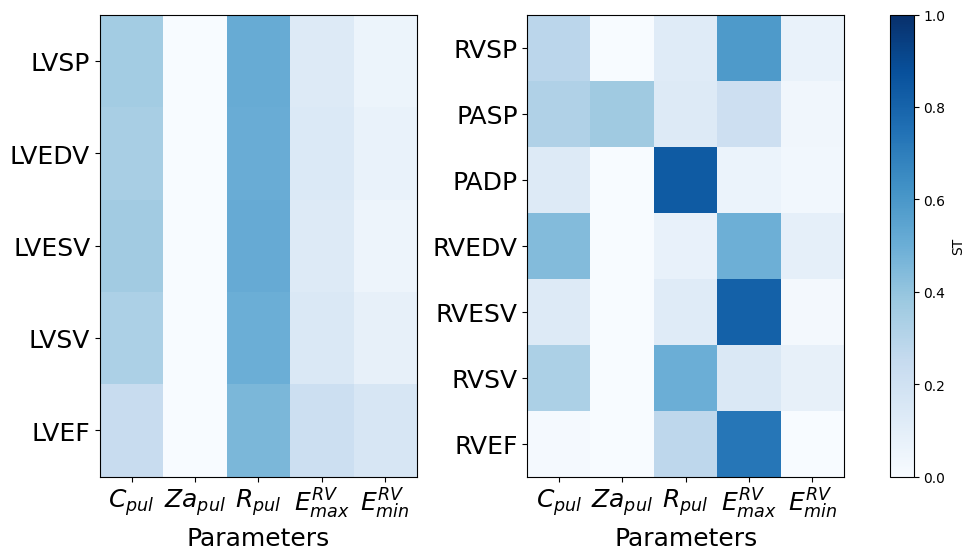

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={ 'wspace': 0.35})
vmin, vmax = 0, 1

im1 = axs[0].imshow(stacked_array_lv, cmap='Blues', aspect='auto', vmin = vmin, vmax = vmax)
axs[0].set_yticks(np.arange(5))
axs[0].set_yticklabels(['LVSP', 'LVEDV', 'LVESV', 'LVSV', 'LVEF'], fontsize=18)
axs[0].set_xticks(np.arange(5))
axs[0].set_xticklabels([r'$C_{pul}$', r'$Za_{pul}$', r'$R_{pul}$', r'$E_{max}^{RV}$', r'$E_{min}^{RV}$'], fontsize=18)
axs[0].set_xlabel('Parameters', fontsize=18)

im2 = axs[1].imshow(stacked_array_rv, cmap='Blues', aspect='auto', vmin = vmin, vmax = vmax)
axs[1].set_yticks(np.arange(7))
axs[1].set_yticklabels(['RVSP', 'PASP', 'PADP', 'RVEDV', 'RVESV', 'RVSV', 'RVEF'], fontsize=18)
axs[1].set_xticks(np.arange(5))
axs[1].set_xticklabels([r'$C_{pul}$', r'$Za_{pul}$', r'$R_{pul}$', r'$E_{max}^{RV}$', r'$E_{min}^{RV}$'], fontsize=18)
axs[1].set_xlabel('Parameters', fontsize=18)

fig.colorbar(im2, ax= np.array([axs[0],axs[1]]), label='ST')


plt.savefig('ST_fixed.svg', format='svg')

plt.show()


In [12]:
plv_max_s1 = plv_max['S1']
prv_max_s1 = prv_max['S1']
ppv_max_s1 = ppv_max['S1']
vrv_max_s1 = vrv_max['S1']
vrv_min_s1 = vrv_min['S1']
lvedv_s1 = lvedv_sobol['S1']
lvesv_s1 = lvesv_sobol['S1']
ppv_min_s1 = ppv_min['S1']
svrv_s1 = svrv['S1']
svlv_s1 = svlv['S1']
rvef_s1 = rvef['S1']
lvef_s1 = lvef['S1']

In [13]:
stacked_array_lv = np.vstack([plv_max_s1, lvedv_s1, lvesv_s1, svlv_s1, lvef_s1])
stacked_array_rv = np.vstack([prv_max_s1, ppv_max_s1, ppv_min_s1, vrv_max_s1, vrv_min_s1, svrv_s1,rvef_s1])

/tmp/ipykernel_3561561/2959085456.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


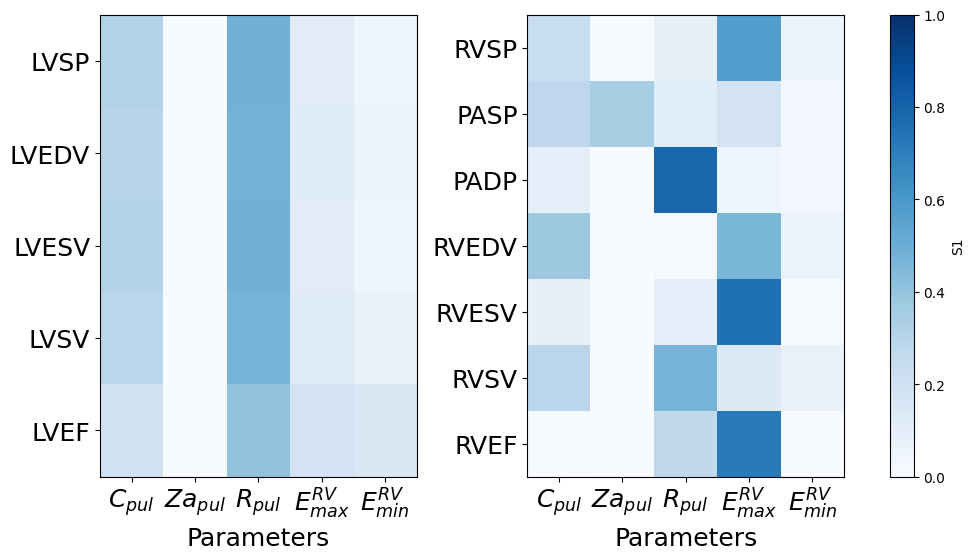

In [14]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={ 'wspace': 0.35})
vmin, vmax = 0, 1

im1 = axs[0].imshow(stacked_array_lv, cmap='Blues', aspect='auto', vmin = vmin, vmax = vmax)
axs[0].set_yticks(np.arange(5))
axs[0].set_yticklabels(['LVSP', 'LVEDV', 'LVESV', 'LVSV', 'LVEF'], fontsize=18)
axs[0].set_xticks(np.arange(5))
axs[0].set_xticklabels([r'$C_{pul}$', r'$Za_{pul}$', r'$R_{pul}$', r'$E_{max}^{RV}$', r'$E_{min}^{RV}$'], fontsize=18)
axs[0].set_xlabel('Parameters', fontsize=18)

im2 = axs[1].imshow(stacked_array_rv, cmap='Blues', aspect='auto', vmin = vmin, vmax = vmax)
axs[1].set_yticks(np.arange(7))
axs[1].set_yticklabels(['RVSP', 'PASP', 'PADP', 'RVEDV', 'RVESV', 'RVSV', 'RVEF'], fontsize=18)
axs[1].set_xticks(np.arange(5))
axs[1].set_xticklabels([r'$C_{pul}$', r'$Za_{pul}$', r'$R_{pul}$', r'$E_{max}^{RV}$', r'$E_{min}^{RV}$'], fontsize=18)
axs[1].set_xlabel('Parameters', fontsize=18)

fig.colorbar(im2, ax=np.array([axs[0],axs[1]]), label='S1')

plt.tight_layout()

plt.savefig('S1_fixed.svg', format='svg')

plt.show()


In [79]:
problem = {
        'num_vars': 5,
        'names': ['C_p', 'Za_p', 'R_p', 'Emax_rv','Emin_rv'],
        'bounds': [[0.0005,0.01], [1, 60], [50, 500], [0.2, 2], [0.01, 0.16]] 
    }
    
param_values =  sobol_sam.sample(problem, 65536*8, calc_second_order = False) #65536*8

In [19]:
flat_array = stacked_array.flatten()

indices = np.argpartition(np.abs(flat_array), -20)[-20:]

sorted_indices = indices[np.argsort(-np.abs(flat_array[indices]))]

max_values = flat_array[sorted_indices]
positions = np.unravel_index(sorted_indices, stacked_array.shape)

for i in range(20):
    print(f"Value: {max_values[i]}, Position: {positions[0][i]}, {positions[1][i]}")

Value: 0.8775354007385598, Position: 4, 2
Value: 0.8080431423722703, Position: 0, 2
Value: 0.8076683545643722, Position: 1, 3
Value: 0.7785270938830349, Position: 6, 2
Value: 0.7741997039080616, Position: 5, 2
Value: 0.6776729108789895, Position: 7, 3
Value: 0.6544976123693311, Position: 3, 3
Value: 0.619713648026306, Position: 8, 2
Value: 0.6111985762005889, Position: 2, 1
Value: 0.3107163605710061, Position: 7, 2
Value: 0.19695845805702358, Position: 2, 3
Value: 0.15239304921804994, Position: 8, 3
Value: 0.14479686983098902, Position: 8, 4
Value: 0.13063359615566397, Position: 3, 2
Value: 0.10017275335636971, Position: 3, 0
Value: 0.09114612548449733, Position: 2, 2
Value: 0.09047837019067821, Position: 5, 3
Value: 0.08727423621895607, Position: 6, 3
Value: 0.07612319477201278, Position: 0, 3
Value: 0.07379712309929756, Position: 3, 4
